<a href="https://colab.research.google.com/github/jurandifr/Python/blob/main/testscases/Demo%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


In [1]:
! python --version

Python 3.10.12


In [3]:
!pip install torch torchvision

In [4]:
# Run this cell for google colab otherwise setup using GIMP-ML/install.bat
# In Colab, choose runtime with GPU acceleration

#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

!git clone https://github.com/kritiksoman/GIMP-ML.git
%cd GIMP-ML
!git checkout --track origin/GIMP3-ML
%cd ..
!pip install GIMP-ML/.
import gimpml
gimpml.setup_python_weights()
%cd /content/GIMP-ML/testscases

fatal: destination path 'GIMP-ML' already exists and is not an empty directory.
/content/GIMP-ML
fatal: A branch named 'GIMP3-ML' already exists.
/content
Processing ./GIMP-ML
  Preparing metadata (setup.py) ... done
  Created wheel for gimpml: filename=gimpml-0.0.8-py3-none-any.whl size=291782 sha256=94eaa9d2964685573d5ad27ec153cfe59082769b1762b2c7a05b71930f21e928
  Stored in directory: /root/.cache/pip/wheels/b9/ba/96/e265d8feef087fef64a88765943d1aa5636d72e7099be8847f
Successfully built gimpml
  Attempting uninstall: gimpml
    Found existing installation: gimpml 0.0.8
    Uninstalling gimpml-0.0.8:
      Successfully uninstalled gimpml-0.0.8

##########
1>> Please add this path to Preferences --> Plug-ins in GIMP :  /usr/local/lib/python3.10/dist-packages/gimpml/plugins
##########

/content/GIMP-ML/testscases


# Imports

In [5]:
import cv2
import gimpml
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))[:, :, ::-1]
        if img is not None:
            images.append(img)
    return images

image = cv2.imread('sampleinput/img.png')[:,:,::-1]
haze = cv2.imread('sampleinput/haze.png')[:,:,::-1]
alpha = cv2.imread('sampleinput/alpha.png')
face = cv2.imread('sampleinput/portrait.jpg')[:,:,::-1]
mask1 = cv2.imread('sampleinput/im1.png')[:,:,::-1]
mask2 = cv2.imread('sampleinput/im2.png')[:,:,::-1]
inpaint = cv2.imread(r'sampleinput/examples/psv/images/psv_04.png')[:,:,::-1]
inpaint_mask = cv2.imread(r'sampleinput/examples/psv/masks/psv_04.png')[:,:,0]
chocolates = cv2.imread('sampleinput/chocolates.jpg')[:,:,::-1]
blur = cv2.imread('sampleinput/blur.jpg')[:,:,::-1]
seg = cv2.imread('sampleinput/car.jpg')[:,:,::-1]

# Canny Edge

True

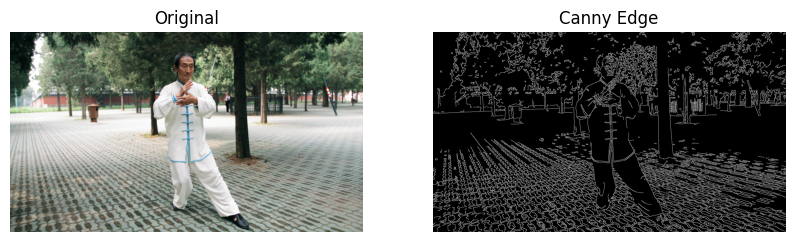

In [6]:
out = gimpml.edge(image)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out)
plt.axis('off')
plt.title("Canny Edge")

cv2.imwrite('output/tmp-canny.jpg', out[:, :, ::-1])

# K Means

True

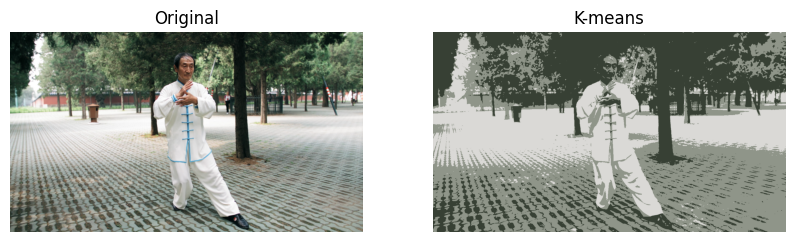

In [7]:
out = gimpml.kmeans(image)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out)
plt.axis('off')
plt.title("K-means")

cv2.imwrite('output/tmp-kmeans.jpg', out[:, :, ::-1])

# De-blurring

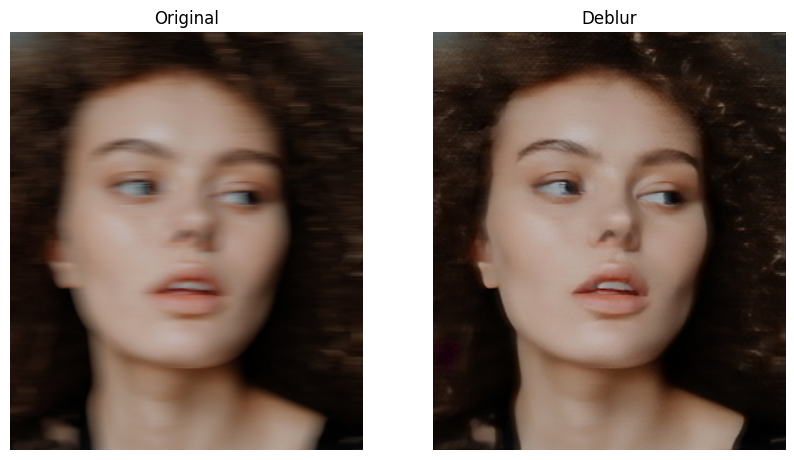

In [8]:
# motion blur removal
out = gimpml.deblur(blur)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(blur)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out)
plt.axis('off')
plt.title("Deblur")

cv2.imwrite('output/tmp-deblur.jpg', out[:, :, ::-1])
torch.cuda.empty_cache()

# Coloring

CPU times: user 1.14 s, sys: 56.8 ms, total: 1.2 s
Wall time: 1.25 s


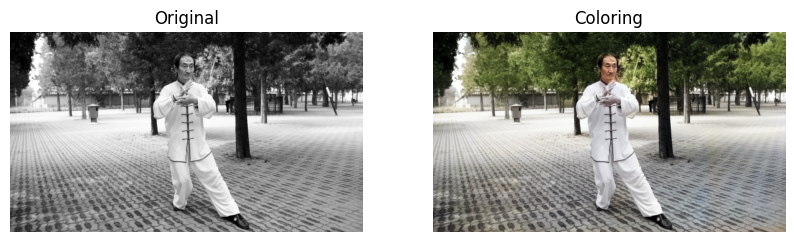

In [21]:
%%time
grey_image = image[:, :, 0]
out = gimpml.deepcolor(grey_image)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(np.repeat(grey_image[:, :, np.newaxis], 3, axis=2))
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out)
plt.axis('off')
plt.title("Coloring")

cv2.imwrite('output/tmp-deepcolor.jpg', out[:, :, ::-1])
torch.cuda.empty_cache()

# De-hazing

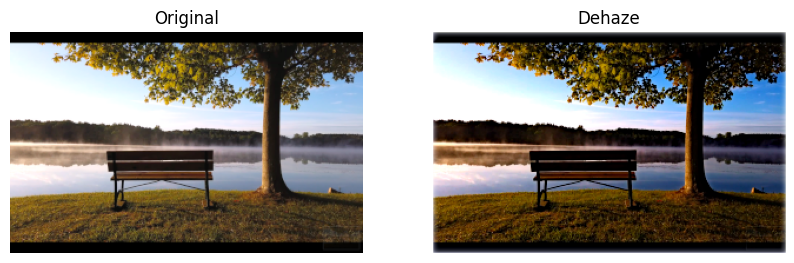

In [10]:
out = gimpml.dehaze(haze)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(haze)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out)
plt.axis('off')
plt.title("Dehaze")

cv2.imwrite('output/tmp-dehaze.jpg', out[:, :, ::-1])
torch.cuda.empty_cache()

# De-noising

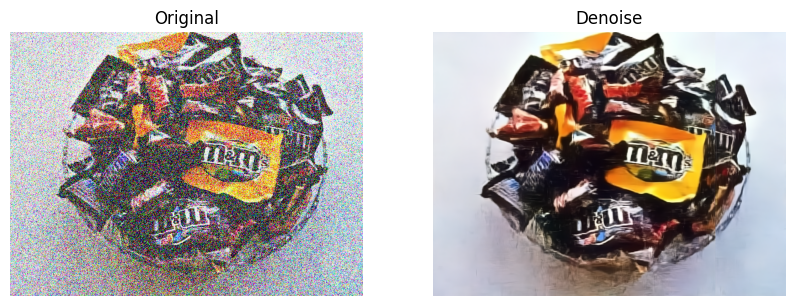

In [11]:
# RGB noise
out = gimpml.denoise(chocolates)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(chocolates)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out.astype(np.uint8))
plt.axis('off')
plt.title("Denoise")

cv2.imwrite('output/tmp-denoise.jpg', out[:, :, ::-1])
torch.cuda.empty_cache()

# Matting

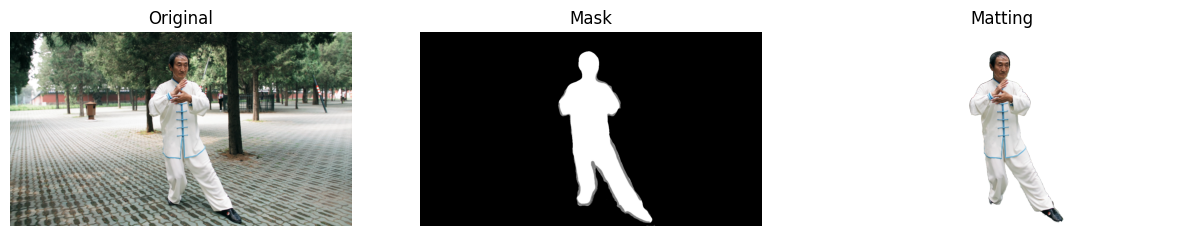

In [12]:
out = gimpml.matting(image, alpha)

fig = plt.figure(figsize=(15, 7))
rows, columns=1,3

fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(alpha)
plt.axis('off')
plt.title("Mask")

fig.add_subplot(rows, columns, 3)
plt.imshow(out)
plt.axis('off')
plt.title("Matting")

cv2.imwrite('output/tmp-matting.png', out[:, :, [2,1,0,3]])  # save as png
torch.cuda.empty_cache()

# Enlightening

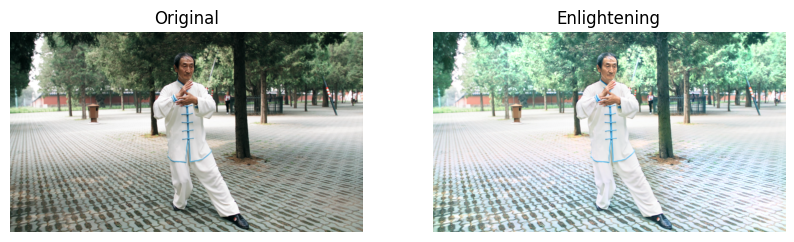

In [13]:
out = gimpml.enlighten(image)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out)
plt.axis('off')
plt.title("Enlightening")

cv2.imwrite('output/tmp-enlighten.jpg', out[:, :, ::-1])
torch.cuda.empty_cache()

# Face parsing

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 194MB/s]


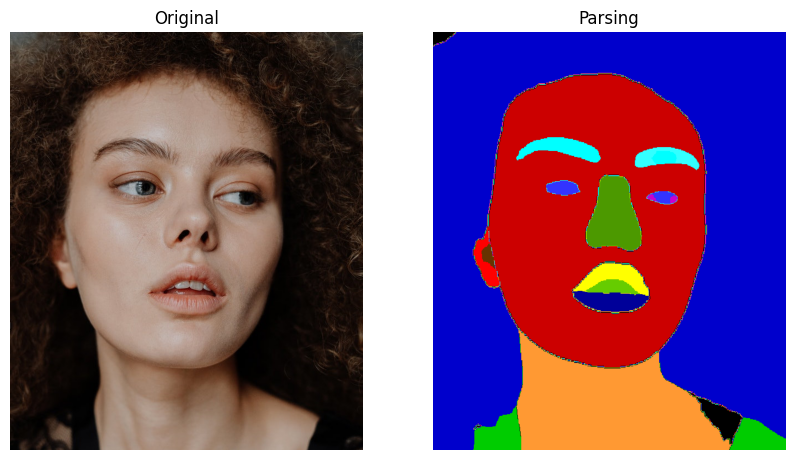

In [14]:
out = gimpml.parseface(face)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(face)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out)
plt.axis('off')
plt.title("Parsing")

cv2.imwrite('output/tmp-parseface.png', out[:, :, ::-1])
torch.cuda.empty_cache()

# Interpolation

In [15]:
gimpml.interpolateframe(mask1, mask2, 'output/interpolateframes')
torch.cuda.empty_cache()
out = load_images_from_folder('output/interpolateframes')

# fig = plt.figure(figsize=(500, 500))
# rows, columns = len(out)/2,len(out)/2

# for idx, o in enumerate(out):
#     fig.add_subplot(rows, columns, idx+1)
#     plt.imshow(o)
#     plt.axis('off')

# Monodepth

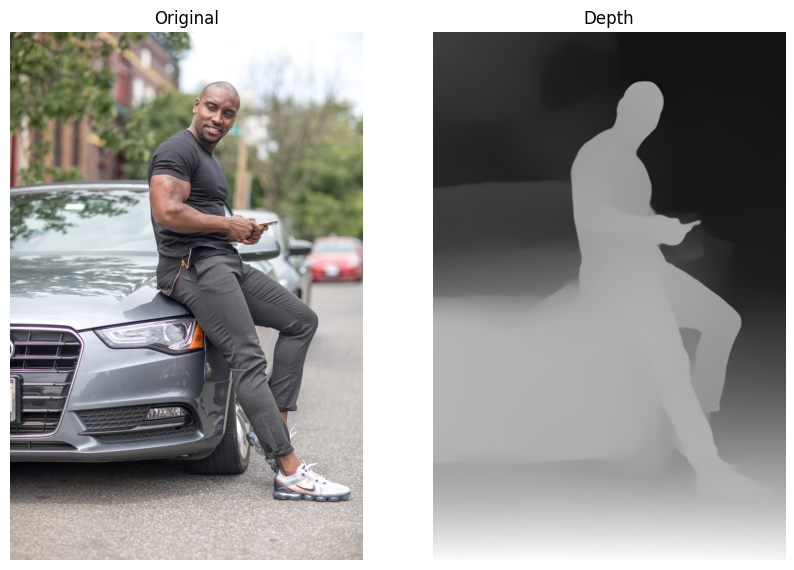

In [16]:
out = gimpml.depth(seg)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(seg)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow((255*out/(out.max()-out.min())).astype(np.uint8))
plt.axis('off')
plt.title("Depth")

cv2.imwrite('output/tmp-depth.png', out.astype("uint16"), [cv2.IMWRITE_PNG_COMPRESSION, 0])
torch.cuda.empty_cache()

# Super-resolution

(759, 640, 3) (3036, 2560, 3)


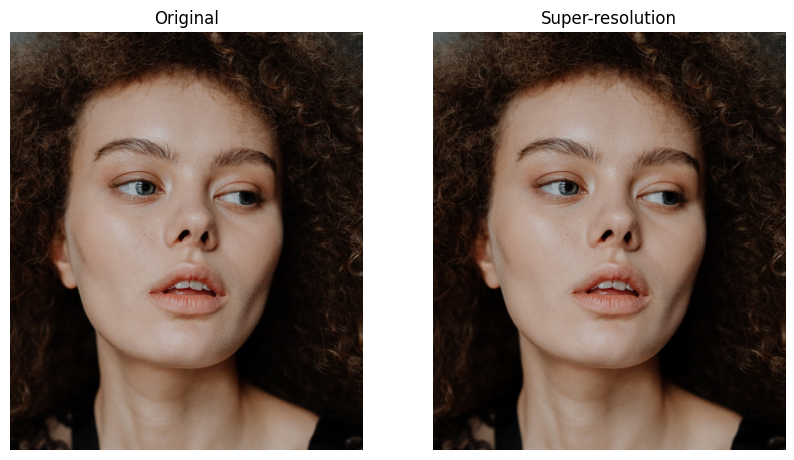

In [17]:
out = gimpml.super(face)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(face)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out.astype(np.uint8))
plt.axis('off')
plt.title("Super-resolution")

cv2.imwrite('output/tmp-super.png', out[:, :, ::-1])
print(face.shape, out.shape)
torch.cuda.empty_cache()

# Semantic Segmentation

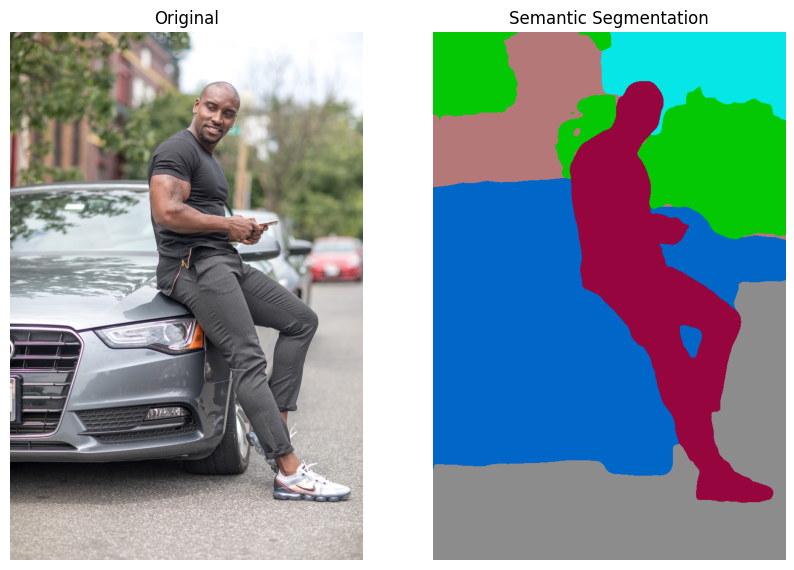

In [18]:
out = gimpml.semseg(seg)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(seg)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out)
plt.axis('off')
plt.title("Semantic Segmentation")

cv2.imwrite('output/tmp-semseg.png', out[:, :, ::-1])
torch.cuda.empty_cache()

# In-painting/ Edge-connect

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 167MB/s]


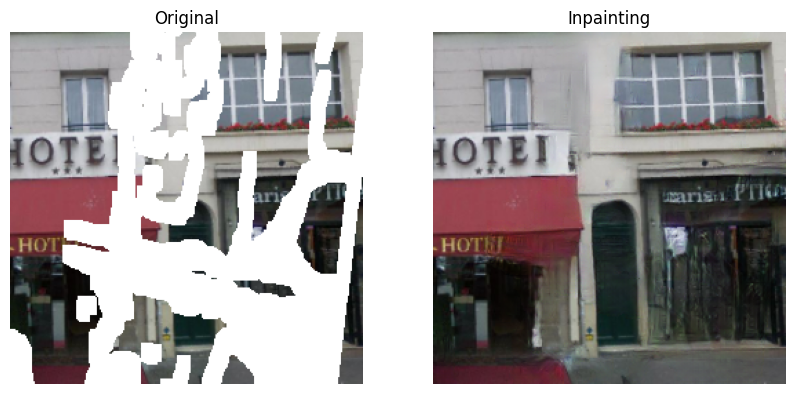

In [19]:
out = gimpml.inpaint(inpaint, inpaint_mask)

fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(inpaint)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out)
plt.axis('off')
plt.title("Inpainting")

cv2.imwrite('output/tmp-inpaint.png', out[:, :, ::-1])
torch.cuda.empty_cache()

# COCO Object Detection

In [ ]:
x,y=960,640
print(x*3,y*3)

2880 1920


In [20]:
dim2, dim1 = y*3, x*3
seg = cv2.resize(seg, (dim1, dim2))
out = gimpml.detect_objects(seg, get_predict_image=True)[0]
fig = plt.figure(figsize=(10, 7))
rows, columns=1,2

fig.add_subplot(rows, columns, 1)
plt.imshow(seg)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(out)
plt.axis('off')
plt.title("Object Detection")

cv2.imwrite('output/tmp-object-detect.png', out[:, :, ::-1])
# torch.cuda.empty_cache()
print(seg.shape)

NameError: name 'y' is not defined

In [ ]:
mem, d1, d2 = [], [], []
for dim1 in range(320,2880,96):
    for dim2 in range(320,2880,96):
        seg = cv2.resize(seg, (dim1, dim2))
        out = gimpml.detect_objects(seg, get_predict_image=True)[0]
        t = torch.cuda.get_device_properties(0).total_memory
        r = torch.cuda.memory_reserved(0)
        a = torch.cuda.memory_allocated(0)
        f = r-a  # free inside reserved
#         print(t,r,a,f)
        mem.append(r)
        d1.append((dim1 - 320) / 96)
        d2.append((dim1 - 320) / 96)
#         print(r, (dim1 - 320) / 96, (dim2 - 320) / 96)
        torch.cuda.empty_cache()
#         break

666894336 0.0 0.0
654311424 0.0 1.0
702545920 0.0 2.0
689963008 0.0 3.0
723517440 0.0 4.0
748683264 0.0 5.0
801112064 0.0 6.0
786432000 0.0 7.0
832569344 0.0 8.0
859832320 0.0 9.0
876609536 0.0 10.0
901775360 0.0 11.0
895483904 0.0 12.0
952107008 0.0 13.0
970981376 0.0 14.0
996147200 0.0 15.0
1021313024 0.0 16.0
1046478848 0.0 17.0
1054867456 0.0 18.0
1080033280 0.0 19.0
1105199104 0.0 20.0
1130364928 0.0 21.0
1155530752 0.0 22.0
1182793728 0.0 23.0
1207959552 0.0 24.0
1231028224 0.0 25.0
1251999744 0.0 26.0
694157312 1.0 0.0
679477248 1.0 1.0
748683264 1.0 2.0
748683264 1.0 3.0
761266176 1.0 4.0
824180736 1.0 5.0
851443712 1.0 6.0
884998144 1.0 7.0
910163968 1.0 8.0
952107008 1.0 9.0
970981376 1.0 10.0
996147200 1.0 11.0
1029701632 1.0 12.0
1054867456 1.0 13.0
1096810496 1.0 14.0
1121976320 1.0 15.0
1155530752 1.0 16.0
1182793728 1.0 17.0
1207959552 1.0 18.0
1251999744 1.0 19.0
1279262720 1.0 20.0
1312817152 1.0 21.0
1337982976 1.0 22.0
1384120320 1.0 23.0
1407188992 1.0 24.0
14428405

2325741568 15.0 10.0
2455764992 15.0 11.0
2602565632 15.0 12.0
2732589056 15.0 13.0
2860515328 15.0 14.0
2998927360 15.0 15.0
3128950784 15.0 16.0
3258974208 15.0 17.0
3388997632 15.0 18.0
3537895424 15.0 19.0
3667918848 15.0 20.0
3797942272 15.0 21.0
3936354304 15.0 22.0
4066377728 15.0 23.0
4196401152 15.0 24.0
4343201792 15.0 25.0
4475322368 15.0 26.0
1021313024 16.0 0.0
1155530752 16.0 1.0
1287651328 16.0 2.0
1434451968 16.0 3.0
1572864000 16.0 4.0
1719664640 16.0 5.0
1858076672 16.0 6.0
2004877312 16.0 7.0
2143289344 16.0 8.0
2292187136 16.0 9.0
2422210560 16.0 10.0
2560622592 16.0 11.0
2707423232 16.0 12.0
2843738112 16.0 13.0
2990538752 16.0 14.0
3128950784 16.0 15.0
3275751424 16.0 16.0
3414163456 16.0 17.0
3546284032 16.0 18.0
3693084672 16.0 19.0
3831496704 16.0 20.0
3978297344 16.0 21.0
4116709376 16.0 22.0
4263510016 16.0 23.0
4404019200 16.0 24.0
4550819840 16.0 25.0
4680843264 16.0 26.0
1046478848 17.0 0.0
1182793728 17.0 1.0
1329594368 17.0 2.0
1484783616 17.0 3.0
162319

In [ ]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved
print(t,r,a,f)
print((dim1 - 320) / 96, (dim2 - 320) / 96)

8589934592 5041553408 0 5041553408
16.666666666666668 26.666666666666668


In [ ]:
data="""666894336 0.0 0.0
654311424 0.0 1.0
702545920 0.0 2.0
689963008 0.0 3.0
723517440 0.0 4.0
748683264 0.0 5.0
801112064 0.0 6.0
786432000 0.0 7.0
832569344 0.0 8.0
859832320 0.0 9.0
876609536 0.0 10.0
901775360 0.0 11.0
895483904 0.0 12.0
952107008 0.0 13.0
970981376 0.0 14.0
996147200 0.0 15.0
1021313024 0.0 16.0
1046478848 0.0 17.0
1054867456 0.0 18.0
1080033280 0.0 19.0
1105199104 0.0 20.0
1130364928 0.0 21.0
1155530752 0.0 22.0
1182793728 0.0 23.0
1207959552 0.0 24.0
1231028224 0.0 25.0
1251999744 0.0 26.0
694157312 1.0 0.0
679477248 1.0 1.0
748683264 1.0 2.0
748683264 1.0 3.0
761266176 1.0 4.0
824180736 1.0 5.0
851443712 1.0 6.0
884998144 1.0 7.0
910163968 1.0 8.0
952107008 1.0 9.0
970981376 1.0 10.0
996147200 1.0 11.0
1029701632 1.0 12.0
1054867456 1.0 13.0
1096810496 1.0 14.0
1121976320 1.0 15.0
1155530752 1.0 16.0
1182793728 1.0 17.0
1207959552 1.0 18.0
1251999744 1.0 19.0
1279262720 1.0 20.0
1312817152 1.0 21.0
1337982976 1.0 22.0
1384120320 1.0 23.0
1407188992 1.0 24.0
1442840576 1.0 25.0
1468006400 1.0 26.0
702545920 2.0 0.0
708837376 2.0 1.0
788529152 2.0 2.0
778043392 2.0 3.0
834666496 2.0 4.0
876609536 2.0 5.0
910163968 2.0 6.0
952107008 2.0 7.0
979369984 2.0 8.0
1021313024 2.0 9.0
1054867456 2.0 10.0
1096810496 2.0 11.0
1130364928 2.0 12.0
1174405120 2.0 13.0
1207959552 2.0 14.0
1251999744 2.0 15.0
1287651328 2.0 16.0
1329594368 2.0 17.0
1363148800 2.0 18.0
1407188992 2.0 19.0
1440743424 2.0 20.0
1484783616 2.0 21.0
1522532352 2.0 22.0
1564475392 2.0 23.0
1598029824 2.0 24.0
1639972864 2.0 25.0
1677721600 2.0 26.0
729808896 3.0 0.0
748683264 3.0 1.0
778043392 3.0 2.0
851443712 3.0 3.0
901775360 3.0 4.0
935329792 3.0 5.0
979369984 3.0 6.0
1021313024 3.0 7.0
1071644672 3.0 8.0
1105199104 3.0 9.0
1155530752 3.0 10.0
1207959552 3.0 11.0
1254096896 3.0 12.0
1304428544 3.0 13.0
1337982976 3.0 14.0
1390411776 3.0 15.0
1434451968 3.0 16.0
1484783616 3.0 17.0
1522532352 3.0 18.0
1572864000 3.0 19.0
1623195648 3.0 20.0
1669332992 3.0 21.0
1719664640 3.0 22.0
1753219072 3.0 23.0
1807745024 3.0 24.0
1849688064 3.0 25.0
1900019712 3.0 26.0
763363328 4.0 0.0
761266176 4.0 1.0
834666496 4.0 2.0
901775360 4.0 3.0
952107008 4.0 4.0
996147200 4.0 5.0
1046478848 4.0 6.0
1096810496 4.0 7.0
1147142144 4.0 8.0
1199570944 4.0 9.0
1251999744 4.0 10.0
1312817152 4.0 11.0
1363148800 4.0 12.0
1415577600 4.0 13.0
1468006400 4.0 14.0
1522532352 4.0 15.0
1572864000 4.0 16.0
1623195648 4.0 17.0
1677721600 4.0 18.0
1744830464 4.0 19.0
1799356416 4.0 20.0
1849688064 4.0 21.0
1900019712 4.0 22.0
1954545664 4.0 23.0
2004877312 4.0 24.0
2055208960 4.0 25.0
2109734912 4.0 26.0
788529152 5.0 0.0
824180736 5.0 1.0
876609536 5.0 2.0
935329792 5.0 3.0
996147200 5.0 4.0
1054867456 5.0 5.0
1105199104 5.0 6.0
1174405120 5.0 7.0
1231028224 5.0 8.0
1287651328 5.0 9.0
1354760192 5.0 10.0
1415577600 5.0 11.0
1468006400 5.0 12.0
1539309568 5.0 13.0
1598029824 5.0 14.0
1652555776 5.0 15.0
1719664640 5.0 16.0
1778384896 5.0 17.0
1832910848 5.0 18.0
1900019712 5.0 19.0
1962934272 5.0 20.0
2030043136 5.0 21.0
2084569088 5.0 22.0
2143289344 5.0 23.0
2216689664 5.0 24.0
2267021312 5.0 25.0
2325741568 5.0 26.0
801112064 6.0 0.0
851443712 6.0 1.0
910163968 6.0 2.0
979369984 6.0 3.0
1046478848 6.0 4.0
1105199104 6.0 5.0
1174405120 6.0 6.0
1251999744 6.0 7.0
1312817152 6.0 8.0
1384120320 6.0 9.0
1440743424 6.0 10.0
1522532352 6.0 11.0
1589641216 6.0 12.0
1652555776 6.0 13.0
1719664640 6.0 14.0
1799356416 6.0 15.0
1858076672 6.0 16.0
1929379840 6.0 17.0
1988100096 6.0 18.0
2063597568 6.0 19.0
2134900736 6.0 20.0
2193620992 6.0 21.0
2267021312 6.0 22.0
2342518784 6.0 23.0
2405433344 6.0 24.0
2472542208 6.0 25.0
2535456768 6.0 26.0
786432000 7.0 0.0
884998144 7.0 1.0
952107008 7.0 2.0
1021313024 7.0 3.0
1096810496 7.0 4.0
1174405120 7.0 5.0
1251999744 7.0 6.0
1329594368 7.0 7.0
1390411776 7.0 8.0
1468006400 7.0 9.0
1547698176 7.0 10.0
1623195648 7.0 11.0
1702887424 7.0 12.0
1769996288 7.0 13.0
1849688064 7.0 14.0
1925185536 7.0 15.0
2004877312 7.0 16.0
2084569088 7.0 17.0
2143289344 7.0 18.0
2225078272 7.0 19.0
2300575744 7.0 20.0
2380267520 7.0 21.0
2455764992 7.0 22.0
2535456768 7.0 23.0
2602565632 7.0 24.0
2682257408 7.0 25.0
2757754880 7.0 26.0
832569344 8.0 0.0
910163968 8.0 1.0
979369984 8.0 2.0
1071644672 8.0 3.0
1147142144 8.0 4.0
1231028224 8.0 5.0
1312817152 8.0 6.0
1390411776 8.0 7.0
1484783616 8.0 8.0
1564475392 8.0 9.0
1639972864 8.0 10.0
1728053248 8.0 11.0
1807745024 8.0 12.0
1900019712 8.0 13.0
1979711488 8.0 14.0
2055208960 8.0 15.0
2143289344 8.0 16.0
2225078272 8.0 17.0
2300575744 8.0 18.0
2397044736 8.0 19.0
2472542208 8.0 20.0
2560622592 8.0 21.0
2640314368 8.0 22.0
2715811840 8.0 23.0
2810183680 8.0 24.0
2885681152 8.0 25.0
2965372928 8.0 26.0
859832320 9.0 0.0
952107008 9.0 1.0
1021313024 9.0 2.0
1105199104 9.0 3.0
1199570944 9.0 4.0
1287651328 9.0 5.0
1384120320 9.0 6.0
1468006400 9.0 7.0
1564475392 9.0 8.0
1652555776 9.0 9.0
1744830464 9.0 10.0
1832910848 9.0 11.0
1925185536 9.0 12.0
2013265920 9.0 13.0
2109734912 9.0 14.0
2193620992 9.0 15.0
2292187136 9.0 16.0
2380267520 9.0 17.0
2455764992 9.0 18.0
2552233984 9.0 19.0
2640314368 9.0 20.0
2732589056 9.0 21.0
2818572288 9.0 22.0
2915041280 9.0 23.0
2998927360 9.0 24.0
3095396352 9.0 25.0
3183476736 9.0 26.0
876609536 10.0 0.0
970981376 10.0 1.0
1054867456 10.0 2.0
1155530752 10.0 3.0
1251999744 10.0 4.0
1354760192 10.0 5.0
1440743424 10.0 6.0
1547698176 10.0 7.0
1639972864 10.0 8.0
1744830464 10.0 9.0
1832910848 10.0 10.0
1937768448 10.0 11.0
2030043136 10.0 12.0
2134900736 10.0 13.0
2225078272 10.0 14.0
2325741568 10.0 15.0
2422210560 10.0 16.0
2527068160 10.0 17.0
2610954240 10.0 18.0
2715811840 10.0 19.0
2810183680 10.0 20.0
2915041280 10.0 21.0
2998927360 10.0 22.0
3103784960 10.0 23.0
3200253952 10.0 24.0
3300917248 10.0 25.0
3388997632 10.0 26.0
901775360 11.0 0.0
996147200 11.0 1.0
1096810496 11.0 2.0
1207959552 11.0 3.0
1312817152 11.0 4.0
1415577600 11.0 5.0
1522532352 11.0 6.0
1623195648 11.0 7.0
1728053248 11.0 8.0
1832910848 11.0 9.0
1937768448 11.0 10.0
2038431744 11.0 11.0
2143289344 11.0 12.0
2250244096 11.0 13.0
2355101696 11.0 14.0
2455764992 11.0 15.0
2560622592 11.0 16.0
2665480192 11.0 17.0
2768240640 11.0 18.0
2885681152 11.0 19.0
2990538752 11.0 20.0
3095396352 11.0 21.0
3200253952 11.0 22.0
3300917248 11.0 23.0
3405774848 11.0 24.0
3512729600 11.0 25.0
3617587200 11.0 26.0
895483904 12.0 0.0
1029701632 12.0 1.0
1130364928 12.0 2.0
1254096896 12.0 3.0
1363148800 12.0 4.0
1468006400 12.0 5.0
1589641216 12.0 6.0
1702887424 12.0 7.0
1807745024 12.0 8.0
1925185536 12.0 9.0
2030043136 12.0 10.0
2143289344 12.0 11.0
2267021312 12.0 12.0
2371878912 12.0 13.0
2485125120 12.0 14.0
2602565632 12.0 15.0
2707423232 12.0 16.0
2818572288 12.0 17.0
2923429888 12.0 18.0
3045064704 12.0 19.0
3154116608 12.0 20.0
3258974208 12.0 21.0
3380609024 12.0 22.0
3493855232 12.0 23.0
3600809984 12.0 24.0
3718250496 12.0 25.0
3823108096 12.0 26.0
952107008 13.0 0.0
1054867456 13.0 1.0
1174405120 13.0 2.0
1304428544 13.0 3.0
1415577600 13.0 4.0
1539309568 13.0 5.0
1652555776 13.0 6.0
1769996288 13.0 7.0
1900019712 13.0 8.0
2013265920 13.0 9.0
2134900736 13.0 10.0
2250244096 13.0 11.0
2371878912 13.0 12.0
2501902336 13.0 13.0
2610954240 13.0 14.0
2732589056 13.0 15.0
2843738112 13.0 16.0
2965372928 13.0 17.0
3078619136 13.0 18.0
3208642560 13.0 19.0
3330277376 13.0 20.0
3439329280 13.0 21.0
3563061248 13.0 22.0
3676307456 13.0 23.0
3806330880 13.0 24.0
3927965696 13.0 25.0
4041211904 13.0 26.0
970981376 14.0 0.0
1096810496 14.0 1.0
1207959552 14.0 2.0
1337982976 14.0 3.0
1468006400 14.0 4.0
1598029824 14.0 5.0
1719664640 14.0 6.0
1849688064 14.0 7.0
1979711488 14.0 8.0
2109734912 14.0 9.0
2225078272 14.0 10.0
2355101696 14.0 11.0
2485125120 14.0 12.0
2610954240 14.0 13.0
2732589056 14.0 14.0
2860515328 14.0 15.0
2990538752 14.0 16.0
3120562176 14.0 17.0
3233808384 14.0 18.0
3363831808 14.0 19.0
3493855232 14.0 20.0
3625975808 14.0 21.0
3747610624 14.0 22.0
3877634048 14.0 23.0
4003463168 14.0 24.0
4133486592 14.0 25.0
4246732800 14.0 26.0
996147200 15.0 0.0
1121976320 15.0 1.0
1251999744 15.0 2.0
1390411776 15.0 3.0
1522532352 15.0 4.0
1652555776 15.0 5.0
1799356416 15.0 6.0
1925185536 15.0 7.0
2055208960 15.0 8.0
2193620992 15.0 9.0
2325741568 15.0 10.0
2455764992 15.0 11.0
2602565632 15.0 12.0
2732589056 15.0 13.0
2860515328 15.0 14.0
2998927360 15.0 15.0
3128950784 15.0 16.0
3258974208 15.0 17.0
3388997632 15.0 18.0
3537895424 15.0 19.0
3667918848 15.0 20.0
3797942272 15.0 21.0
3936354304 15.0 22.0
4066377728 15.0 23.0
4196401152 15.0 24.0
4343201792 15.0 25.0
4475322368 15.0 26.0
1021313024 16.0 0.0
1155530752 16.0 1.0
1287651328 16.0 2.0
1434451968 16.0 3.0
1572864000 16.0 4.0
1719664640 16.0 5.0
1858076672 16.0 6.0
2004877312 16.0 7.0
2143289344 16.0 8.0
2292187136 16.0 9.0
2422210560 16.0 10.0
2560622592 16.0 11.0
2707423232 16.0 12.0
2843738112 16.0 13.0
2990538752 16.0 14.0
3128950784 16.0 15.0
3275751424 16.0 16.0
3414163456 16.0 17.0
3546284032 16.0 18.0
3693084672 16.0 19.0
3831496704 16.0 20.0
3978297344 16.0 21.0
4116709376 16.0 22.0
4263510016 16.0 23.0
4404019200 16.0 24.0
4550819840 16.0 25.0
4680843264 16.0 26.0
1046478848 17.0 0.0
1182793728 17.0 1.0
1329594368 17.0 2.0
1484783616 17.0 3.0
1623195648 17.0 4.0
1778384896 17.0 5.0
1929379840 17.0 6.0
2084569088 17.0 7.0
2225078272 17.0 8.0
2380267520 17.0 9.0
2527068160 17.0 10.0
2665480192 17.0 11.0
2818572288 17.0 12.0
2965372928 17.0 13.0
3120562176 17.0 14.0
3258974208 17.0 15.0
3414163456 17.0 16.0
3563061248 17.0 17.0
3701473280 17.0 18.0
3856662528 17.0 19.0
4007657472 17.0 20.0
4162846720 17.0 21.0
4301258752 17.0 22.0
4458545152 17.0 23.0
4605345792 17.0 24.0
4760535040 17.0 25.0
4898947072 17.0 26.0
1054867456 18.0 0.0
1207959552 18.0 1.0
1363148800 18.0 2.0
1522532352 18.0 3.0
1677721600 18.0 4.0
1832910848 18.0 5.0
1988100096 18.0 6.0
2143289344 18.0 7.0
2300575744 18.0 8.0
2455764992 18.0 9.0
2610954240 18.0 10.0
2768240640 18.0 11.0
2923429888 18.0 12.0
3078619136 18.0 13.0
3233808384 18.0 14.0
3388997632 18.0 15.0
3546284032 18.0 16.0
3701473280 18.0 17.0
3856662528 18.0 18.0
4016046080 18.0 19.0
4171235328 18.0 20.0
4326424576 18.0 21.0
4483710976 18.0 22.0
4638900224 18.0 23.0
4794089472 18.0 24.0
4949278720 18.0 25.0
5100273664 18.0 26.0
1080033280 19.0 0.0
1251999744 19.0 1.0
1407188992 19.0 2.0
1572864000 19.0 3.0
1744830464 19.0 4.0
1900019712 19.0 5.0
2063597568 19.0 6.0
2225078272 19.0 7.0
2397044736 19.0 8.0
2552233984 19.0 9.0
2715811840 19.0 10.0
2885681152 19.0 11.0
3045064704 19.0 12.0
3208642560 19.0 13.0
3363831808 19.0 14.0
3537895424 19.0 15.0
3693084672 19.0 16.0
3856662528 19.0 17.0
4016046080 19.0 18.0
4188012544 19.0 19.0
4353687552 19.0 20.0
4508876800 19.0 21.0
4680843264 19.0 22.0
4840226816 19.0 23.0
4999610368 19.0 24.0
5154799616 19.0 25.0
5326766080 19.0 26.0
1105199104 20.0 0.0
1279262720 20.0 1.0
1440743424 20.0 2.0
1623195648 20.0 3.0
1799356416 20.0 4.0
1962934272 20.0 5.0
2134900736 20.0 6.0
2300575744 20.0 7.0
2472542208 20.0 8.0
2640314368 20.0 9.0
2810183680 20.0 10.0
2990538752 20.0 11.0
3154116608 20.0 12.0
3330277376 20.0 13.0
3493855232 20.0 14.0
3667918848 20.0 15.0
3831496704 20.0 16.0
4007657472 20.0 17.0
4171235328 20.0 18.0
4353687552 20.0 19.0
4525654016 20.0 20.0
4689231872 20.0 21.0
4865392640 20.0 22.0
5024776192 20.0 23.0
5196742656 20.0 24.0
5360320512 20.0 25.0
5536481280 20.0 26.0
1130364928 21.0 0.0
1312817152 21.0 1.0
1484783616 21.0 2.0
1669332992 21.0 3.0
1849688064 21.0 4.0
2030043136 21.0 5.0
2193620992 21.0 6.0
2380267520 21.0 7.0
2560622592 21.0 8.0
2732589056 21.0 9.0
2915041280 21.0 10.0
3095396352 21.0 11.0
3258974208 21.0 12.0
3439329280 21.0 13.0
3625975808 21.0 14.0
3797942272 21.0 15.0
3978297344 21.0 16.0
4162846720 21.0 17.0
4326424576 21.0 18.0
4508876800 21.0 19.0
4689231872 21.0 20.0
4873781248 21.0 21.0
5041553408 21.0 22.0
5221908480 21.0 23.0
5406457856 21.0 24.0
5570035712 21.0 25.0
5750390784 21.0 26.0
1155530752 22.0 0.0
1337982976 22.0 1.0
1522532352 22.0 2.0
1719664640 22.0 3.0
1900019712 22.0 4.0
2084569088 22.0 5.0
2267021312 22.0 6.0
2455764992 22.0 7.0
2640314368 22.0 8.0
2818572288 22.0 9.0
2998927360 22.0 10.0
3200253952 22.0 11.0
3380609024 22.0 12.0
3563061248 22.0 13.0
3747610624 22.0 14.0
3936354304 22.0 15.0
4116709376 22.0 16.0
4301258752 22.0 17.0
4483710976 22.0 18.0
4680843264 22.0 19.0
4865392640 22.0 20.0
5041553408 22.0 21.0
5221908480 22.0 22.0
5414846464 22.0 23.0
5595201536 22.0 24.0
5775556608 22.0 25.0
5960105984 22.0 26.0
1182793728 23.0 0.0
1384120320 23.0 1.0
1564475392 23.0 2.0
1753219072 23.0 3.0
1954545664 23.0 4.0
2143289344 23.0 5.0
2342518784 23.0 6.0
2535456768 23.0 7.0
2715811840 23.0 8.0
2915041280 23.0 9.0
3103784960 23.0 10.0
3300917248 23.0 11.0
3493855232 23.0 12.0
3676307456 23.0 13.0
3877634048 23.0 14.0
4066377728 23.0 15.0
4263510016 23.0 16.0
4458545152 23.0 17.0
4638900224 23.0 18.0
4840226816 23.0 19.0
5024776192 23.0 20.0
5221908480 23.0 21.0
5414846464 23.0 22.0
5611978752 23.0 23.0
5792333824 23.0 24.0
5985271808 23.0 25.0
6182404096 23.0 26.0
1207959552 24.0 0.0
1407188992 24.0 1.0
1598029824 24.0 2.0
1807745024 24.0 3.0
2004877312 24.0 4.0
2216689664 24.0 5.0
2405433344 24.0 6.0
2602565632 24.0 7.0
2810183680 24.0 8.0
2998927360 24.0 9.0
3200253952 24.0 10.0
3405774848 24.0 11.0
3600809984 24.0 12.0
3806330880 24.0 13.0
4003463168 24.0 14.0
4196401152 24.0 15.0
4404019200 24.0 16.0
4605345792 24.0 17.0
4794089472 24.0 18.0
4999610368 24.0 19.0
5196742656 24.0 20.0
5406457856 24.0 21.0
5595201536 24.0 22.0
5792333824 24.0 23.0
6002049024 24.0 24.0
6190792704 24.0 25.0
6392119296 24.0 26.0
1231028224 25.0 0.0
1442840576 25.0 1.0
1639972864 25.0 2.0
1849688064 25.0 3.0
2055208960 25.0 4.0
2267021312 25.0 5.0
2472542208 25.0 6.0
2682257408 25.0 7.0
2885681152 25.0 8.0
3095396352 25.0 9.0
3300917248 25.0 10.0
3512729600 25.0 11.0
3718250496 25.0 12.0
3927965696 25.0 13.0
4133486592 25.0 14.0
4343201792 25.0 15.0
4550819840 25.0 16.0
4760535040 25.0 17.0
4949278720 25.0 18.0
5154799616 25.0 19.0
5360320512 25.0 20.0
5570035712 25.0 21.0
5775556608 25.0 22.0
5985271808 25.0 23.0
6190792704 25.0 24.0
6400507904 25.0 25.0
6606028800 25.0 26.0
1251999744 26.0 0.0
1468006400 26.0 1.0
1677721600 26.0 2.0
1900019712 26.0 3.0
2109734912 26.0 4.0
2325741568 26.0 5.0
2535456768 26.0 6.0
2757754880 26.0 7.0
2965372928 26.0 8.0
3183476736 26.0 9.0
3388997632 26.0 10.0
3617587200 26.0 11.0
3823108096 26.0 12.0
4041211904 26.0 13.0
4246732800 26.0 14.0
4475322368 26.0 15.0
4680843264 26.0 16.0
4898947072 26.0 17.0
5100273664 26.0 18.0
5326766080 26.0 19.0
5536481280 26.0 20.0
5750390784 26.0 21.0
5960105984 26.0 22.0
6182404096 26.0 23.0
6392119296 26.0 24.0
6606028800 26.0 25.0
6815744000 26.0 26.0"""


In [ ]:
import pandas as pd
df=pd.DataFrame([x.split(" ") for x in data.split("\n")])
df[0] = df[0].astype(float)
df[1] = df[1].astype(float)
df[2] = df[2].astype(float)

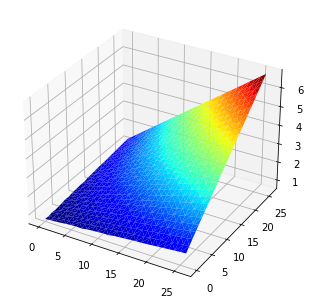

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df[1], df[2], df[0], cmap=cm.jet, linewidth=1)
plt.show()